In [1]:
# Imports all packages necessary or useful

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Opens our medical_clean data csv file for analysis

df = pd.read_csv(r"C:\Users\caleb\OneDrive\Desktop\WGU\D208 - Predictive Modeling\medical_clean.csv")

In [3]:
# Profiles our csv file following importing data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Gives us a snapshot of values contained in each of our variables

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
# Detects any duplicated observations in our data set

df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
# Detects any null values in our data set

df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [7]:
# For this assessment, I have chosen 'HighBlood' as our dependent variable for logistic regression

df['HighBlood'].value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [8]:
# For this project, we are interested in the following response variables to compare with our independent variable, 'HighBlood'

# Categorical variables should be recast from objects for analysis
# We will compare 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', and 'Anxiety'

# Creates a dictionary assignment

rebool = {'No': 0, 'Yes': 1}

In [9]:
# Remaps boolean values to integers in our selected variables

df['HighBlood'] = df['HighBlood'].map(rebool)

In [10]:
# Converts type from "object" to "category" for one hot encoding

df['Marital'] = df['Marital'].astype("category")

# Confirms data type recast was successful

df['Marital'].info()

# Displays and counts values within variable

df['Marital'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Marital
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.1 KB


Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

In [11]:
# Converts type from "object" to "category" for one hot encoding

df['Gender'] = df['Gender'].astype("category")

# Confirms data type recast was successful

df['Gender'].info()

# Displays and counts values within variable

df['Gender'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Gender
Non-Null Count  Dtype   
--------------  -----   
10000 non-null  category
dtypes: category(1)
memory usage: 10.0 KB


Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

In [12]:
# Remaps boolean values to integers in our selected variables

df['Stroke'] = df['Stroke'].map(rebool)

In [13]:
# Remaps boolean values to integers in our selected variables

df['Overweight'] = df['Overweight'].map(rebool)

In [14]:
# Remaps boolean values to integers in our selected variables

df['Diabetes'] = df['Diabetes'].map(rebool)

In [15]:
# Remaps boolean values to integers in our selected variables

df['Hyperlipidemia'] = df['Hyperlipidemia'].map(rebool)

In [16]:
# Remaps boolean values to integers in our selected variables

df['BackPain'] = df['BackPain'].map(rebool)

In [17]:
# Remaps boolean values to integers in our selected variables

df['Anxiety'] = df['Anxiety'].map(rebool)

In [18]:
# Reviews our data set following re-expression of categorical data

pd.set_option("display.max_columns", 0)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,1,0,Medium,0,Yes,1,0,1,1,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,1,0,High,1,No,0,0,0,0,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,1,0,Medium,1,No,1,0,0,0,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,0,1,Medium,0,Yes,0,0,0,0,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,0,0,Low,0,No,0,1,0,0,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [19]:
# We can create a new data frame to include only the variables mentioned above

new_df = df[['HighBlood', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety']]

In [20]:
# Calls and profiles the new data fram containing only variables we are concerned with regarding our research question
# No object datatypes are present

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   HighBlood       10000 non-null  int64   
 1   Children        10000 non-null  int64   
 2   Age             10000 non-null  int64   
 3   Income          10000 non-null  float64 
 4   Marital         10000 non-null  category
 5   Gender          10000 non-null  category
 6   VitD_levels     10000 non-null  float64 
 7   Stroke          10000 non-null  int64   
 8   Overweight      10000 non-null  int64   
 9   Diabetes        10000 non-null  int64   
 10  Hyperlipidemia  10000 non-null  int64   
 11  BackPain        10000 non-null  int64   
 12  Anxiety         10000 non-null  int64   
dtypes: category(2), float64(2), int64(9)
memory usage: 879.4 KB


In [21]:
# Creates dummy variables for our nominal categorical variables with more than 2 values to ensure K-1 is true and to avoid perfect multicollinearity

new_df = pd.get_dummies(df, columns=['Marital', 'Gender'], drop_first=True)

In [22]:
# Lists columns in new data set to copy/paste into code and delete variables we aren't interested in via df.drop

new_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'ReAdmis', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin',
       'HighBlood', 'Stroke', 'Complication_risk', 'Overweight', 'Arthritis',
       'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services',
       'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Marital_Married',
       'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed',
       'Gender_Male', 'Gender_Nonbinary'],
      dtype='object')

In [23]:
# Creates a new dataframe that drops variables we aren't interested in

# As above, 'HighBlood', 'Children', 'Age', 'Income', 'Marital', 'Gender', 'VitD_levels', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety' are retained

new_df = new_df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Initial_admin', 'Complication_risk', 'Arthritis', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [24]:
# Returns a snapshot of our new columns

new_df.columns

Index(['Children', 'Age', 'Income', 'VitD_levels', 'HighBlood', 'Stroke',
       'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary'],
      dtype='object')

In [25]:
# The new_df data frame we created only includes variables we are interested in as well as nominal dummy variables

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Children               10000 non-null  int64  
 1   Age                    10000 non-null  int64  
 2   Income                 10000 non-null  float64
 3   VitD_levels            10000 non-null  float64
 4   HighBlood              10000 non-null  int64  
 5   Stroke                 10000 non-null  int64  
 6   Overweight             10000 non-null  int64  
 7   Diabetes               10000 non-null  int64  
 8   Hyperlipidemia         10000 non-null  int64  
 9   BackPain               10000 non-null  int64  
 10  Anxiety                10000 non-null  int64  
 11  Marital_Married        10000 non-null  uint8  
 12  Marital_Never Married  10000 non-null  uint8  
 13  Marital_Separated      10000 non-null  uint8  
 14  Marital_Widowed        10000 non-null  uint8  
 15  Gen

In [26]:
# Views values contained in our variables to confirm successful re-expression

new_df.head()

,Children,Age,Income,VitD_levels,HighBlood,Stroke,Overweight,Diabetes,Hyperlipidemia,BackPain,Anxiety,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Gender_Male,Gender_Nonbinary
0,1,53,86575.93,19.141466,1,0,0,1,0,1,1,0,0,0,0,1,0
1,3,51,46805.99,18.940352,1,0,1,0,0,0,0,1,0,0,0,0,0
2,3,53,14370.14,18.057507,1,0,1,1,0,0,0,0,0,0,1,0,0
3,0,78,39741.49,16.576858,0,1,0,0,0,0,0,1,0,0,0,1,0
4,1,22,1209.56,17.439069,0,0,0,0,1,0,0,0,0,0,1,0,0


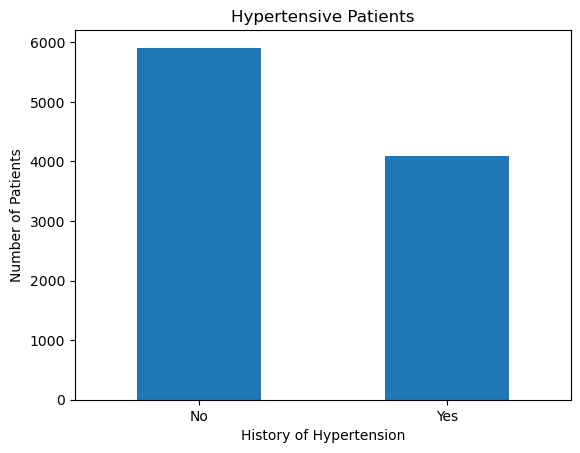

In [27]:
# Creates a visualization of our dependent variable

new_df['HighBlood'].value_counts().plot.bar(rot=0)
plt.title('Hypertensive Patients')
plt.xlabel('History of Hypertension')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In [28]:
# Repeats our code from above to allow us to see exact figures
# We apprecaite 5910 patients who are not hypertensive, and 4090 hypertensive patients for 10,000 total observations

df['HighBlood'].value_counts()

0    5910
1    4090
Name: HighBlood, dtype: int64

In [29]:
# Provides summary statistics for 'Children'

new_df['Children'].describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

In [30]:
# Provides unique value counts for observations in 'Children'

new_df['Children'].value_counts()

0     2548
1     2509
3     1489
2     1475
4      995
7      213
8      209
6      191
5      169
9      108
10      94
Name: Children, dtype: int64

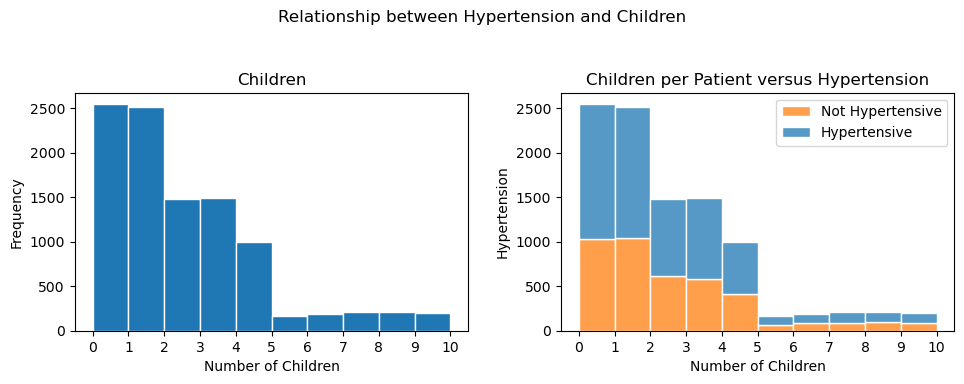

In [31]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Relationship between Hypertension and Children') 

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Children')
plt.hist(data=new_df, x='Children', edgecolor="white")
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.xticks(range(11))

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.histplot(data=new_df, multiple="stack", x='Children', hue='HighBlood', bins=11, binwidth=1, edgecolor="white")
plt.title("Children per Patient versus Hypertension")
plt.xlabel('Number of Children')
plt.ylabel('Hypertension')
plt.legend(('Not Hypertensive', 'Hypertensive'))
plt.xticks(range(11))

plt.tight_layout(pad=2)
plt.show()

In [32]:
# Describes 'Age'

new_df['Age'].describe()

count    10000.000000
mean        53.511700
std         20.638538
min         18.000000
25%         36.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

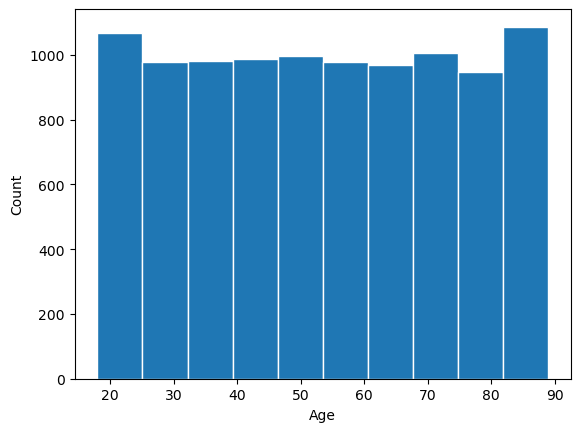

In [33]:
# Visualizes 'Age' as a histogram

plt.hist(new_df['Age'], edgecolor="white")
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

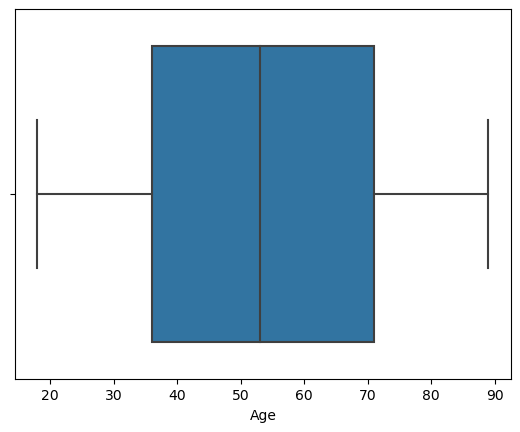

In [34]:
# Visualizes 'Age' to detect outliers

boxplot=sns.boxplot(x='Age',data=new_df)

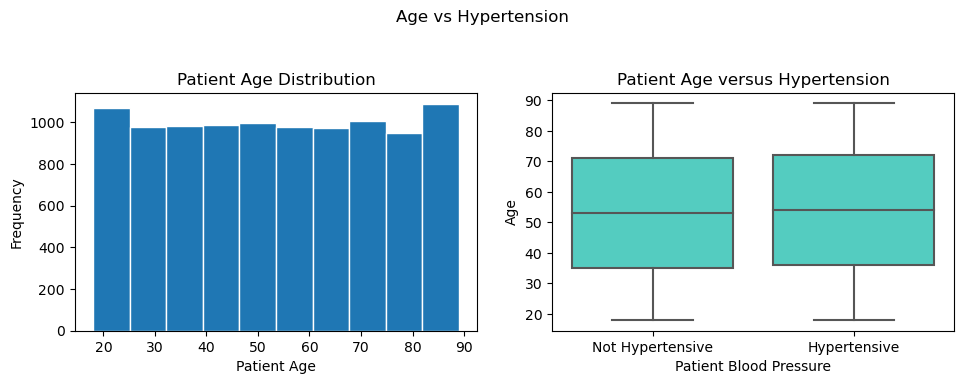

In [35]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Age vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Patient Age Distribution')
plt.hist(data=new_df, x='Age', edgecolor="white")
plt.xlabel('Patient Age')
plt.ylabel('Frequency')

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.boxplot(data=new_df, x="HighBlood", y="Age", color="turquoise")
plt.title("Patient Age versus Hypertension")
plt.xlabel('Patient Blood Pressure')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1], labels=['Not Hypertensive', 'Hypertensive'])

plt.tight_layout(pad=2)
plt.show()

In [36]:
# Describes 'Income'

new_df['Income'].describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

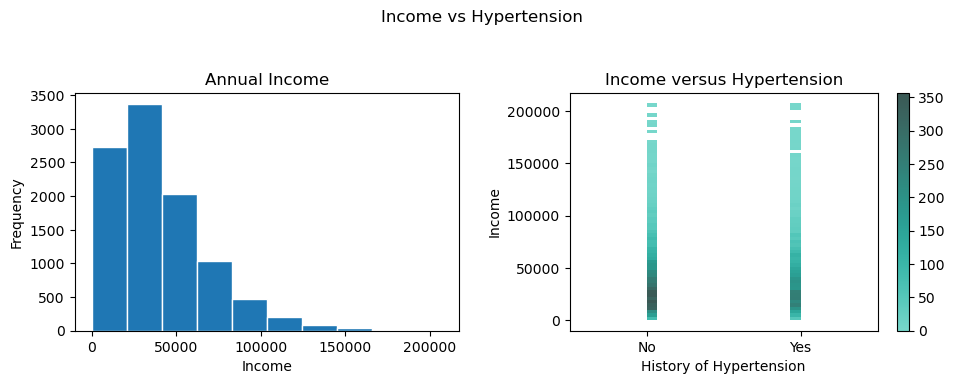

In [37]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Income vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.hist(data=new_df, x='Income', edgecolor="white")
plt.title('Annual Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.histplot(data=new_df, x="HighBlood", y="Income", color='turquoise', cbar=True)
plt.margins(x=.5)
plt.title("Income versus Hypertension")
plt.xlabel("History of Hypertension")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout(pad=2)
plt.show()

In [38]:
# Describes 'VitD_levels'

new_df['VitD_levels'].describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

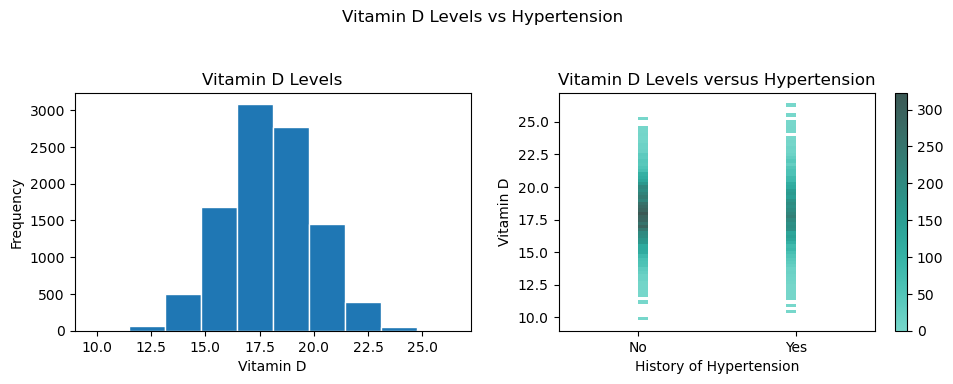

In [39]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Vitamin D Levels vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.hist(data=new_df, x='VitD_levels', edgecolor="white")
plt.title('Vitamin D Levels')
plt.xlabel('Vitamin D')
plt.ylabel('Frequency')

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
sns.histplot(data=new_df, x="HighBlood", y="VitD_levels", color='turquoise', cbar=True)
plt.margins(x=.5)
plt.title("Vitamin D Levels versus Hypertension")
plt.xlabel("History of Hypertension")
plt.ylabel("Vitamin D")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.tight_layout(pad=2)
plt.show()

In [40]:
# Describes 'Stroke'

df['Stroke'].value_counts()

0    8007
1    1993
Name: Stroke, dtype: int64

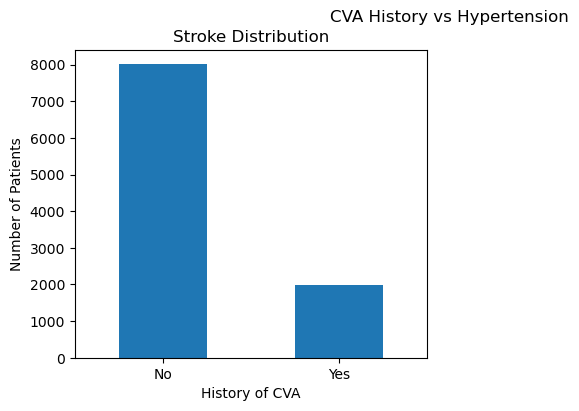

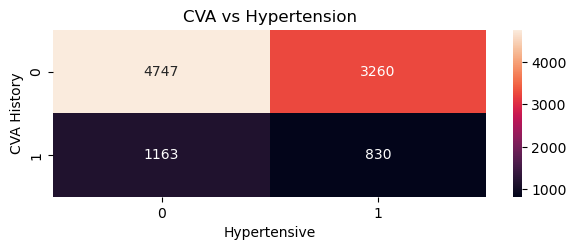

In [41]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('CVA History vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Stroke'].value_counts().plot.bar(rot=0)
plt.title('Stroke Distribution')
plt.xlabel('History of CVA')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpcva = new_df.groupby(["HighBlood", "Stroke"]).size().unstack(level=0)
sns.heatmap(bpcva, annot=True, fmt=".0f")
plt.title("CVA vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("CVA History")

plt.tight_layout(pad=2)
plt.show()

In [42]:
# Describes 'Overweight'

df['Overweight'].value_counts()

1    7094
0    2906
Name: Overweight, dtype: int64

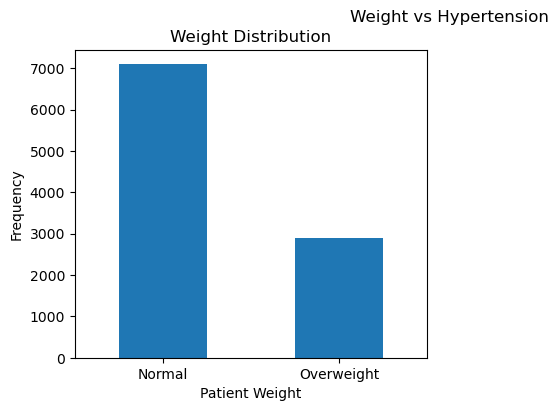

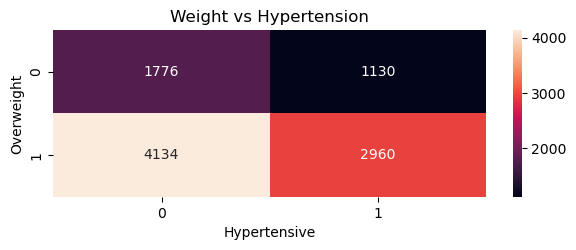

In [43]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Weight vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Overweight'].value_counts().plot.bar(rot=0)
plt.title('Weight Distribution')
plt.xlabel('Patient Weight')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Normal', 'Overweight'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bplbs = new_df.groupby(["HighBlood", "Overweight"]).size().unstack(level=0)
sns.heatmap(bplbs, annot=True, fmt=".0f")
plt.title("Weight vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Overweight")

plt.tight_layout(pad=2)
plt.show()

In [44]:
# Describes 'Diabetes'

df['Diabetes'].value_counts()

0    7262
1    2738
Name: Diabetes, dtype: int64

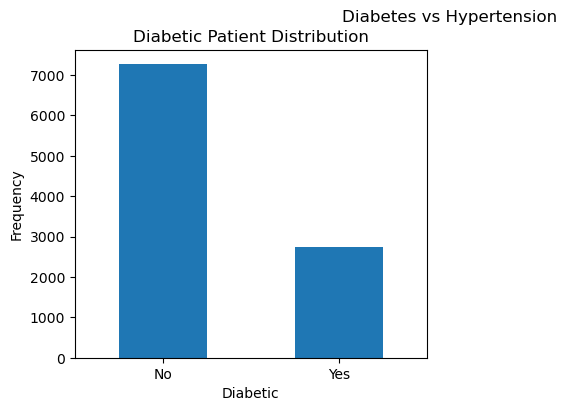

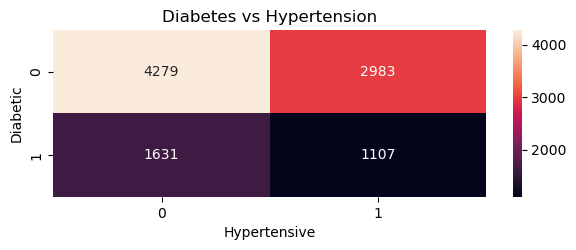

In [45]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Diabetes vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Diabetes'].value_counts().plot.bar(rot=0)
plt.title('Diabetic Patient Distribution')
plt.xlabel('Diabetic')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpdiab = new_df.groupby(["HighBlood", "Diabetes"]).size().unstack(level=0)
sns.heatmap(bpdiab, annot=True, fmt=".0f")
plt.title("Diabetes vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Diabetic")

plt.tight_layout(pad=2)
plt.show()

In [46]:
# Describes 'Hyperlipidemia'

df['Hyperlipidemia'].value_counts()

0    6628
1    3372
Name: Hyperlipidemia, dtype: int64

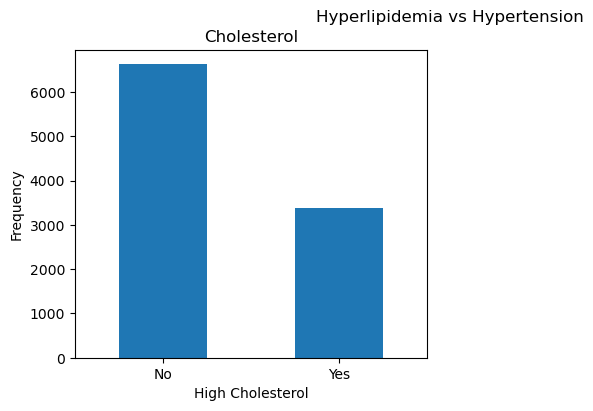

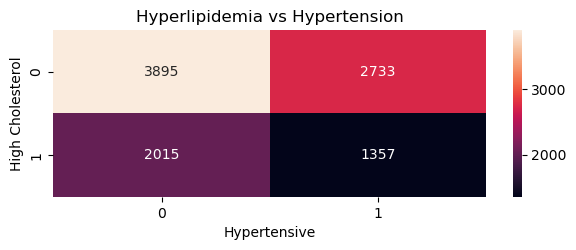

In [47]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Hyperlipidemia vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Hyperlipidemia'].value_counts().plot.bar(rot=0)
plt.title('Cholesterol')
plt.xlabel('High Cholesterol')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bphdl = new_df.groupby(["HighBlood", "Hyperlipidemia"]).size().unstack(level=0)
sns.heatmap(bphdl, annot=True, fmt=".0f")
plt.title("Hyperlipidemia vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("High Cholesterol")

plt.tight_layout(pad=2)
plt.show()

In [48]:
# Describes 'BackPain'

df['BackPain'].value_counts()

0    5886
1    4114
Name: BackPain, dtype: int64

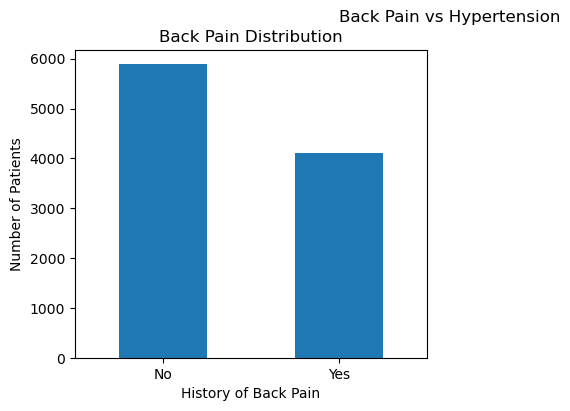

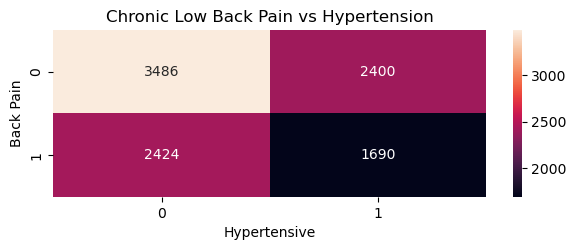

In [49]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Back Pain vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['BackPain'].value_counts().plot.bar(rot=0)
plt.title('Back Pain Distribution')
plt.xlabel('History of Back Pain')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bplbp = new_df.groupby(["HighBlood", "BackPain"]).size().unstack(level=0)
sns.heatmap(bplbp, annot=True, fmt=".0f")
plt.title("Chronic Low Back Pain vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Back Pain")

plt.tight_layout(pad=2)
plt.show()

In [50]:
# Describes 'Anxiety'

df['Anxiety'].value_counts()

0    6785
1    3215
Name: Anxiety, dtype: int64

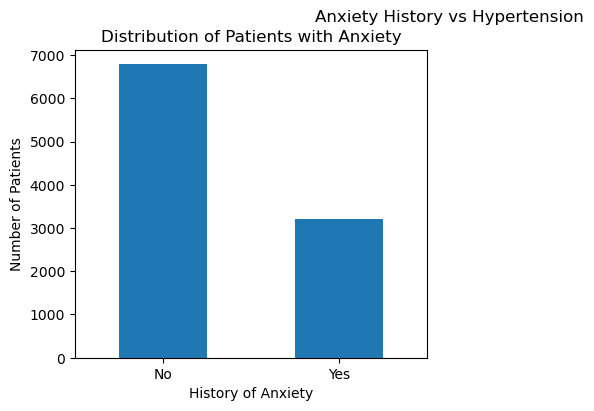

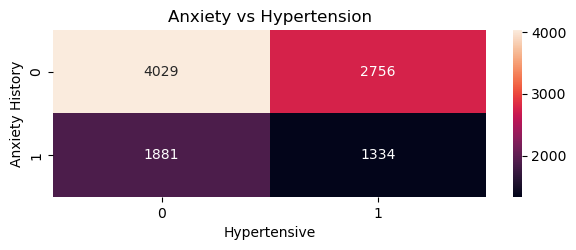

In [51]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Anxiety History vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Anxiety'].value_counts().plot.bar(rot=0)
plt.title('Distribution of Patients with Anxiety')
plt.xlabel('History of Anxiety')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpanx = new_df.groupby(["HighBlood", "Anxiety"]).size().unstack(level=0)
sns.heatmap(bpanx, annot=True, fmt=".0f")
plt.title("Anxiety vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Anxiety History")

plt.tight_layout(pad=2)
plt.show()

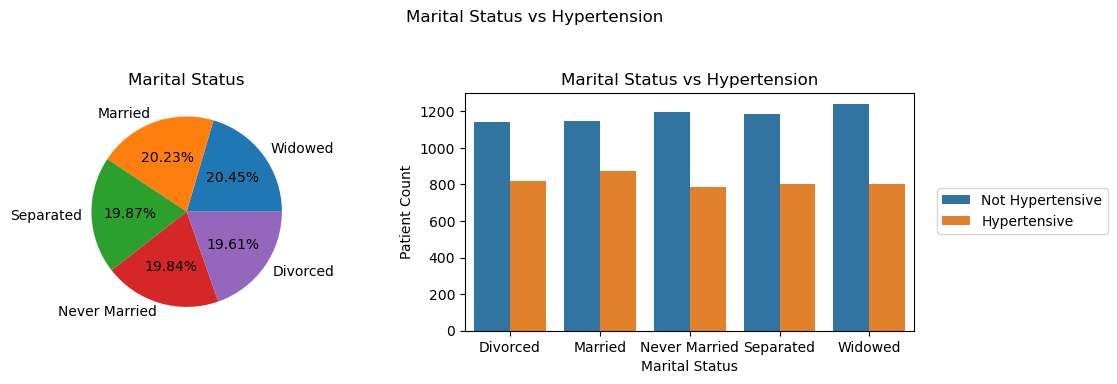

In [52]:
# Creates a figure comparing our explanatory variable with our categoical 'Marital' data prior to transformation and dropping of dummy variable

plt.figure(figsize=(12, 4))
plt.suptitle('Marital Status vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Marital Status')
mstatus = df['Marital'].value_counts()
marcat = ['Widowed', 'Married', 'Separated', 'Never Married', 'Divorced']
plt.pie(mstatus, labels=marcat, autopct="%.2F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
plt.title('Marital Status vs Hypertension')
sns.countplot(data = df, x="Marital", hue="HighBlood")
plt.legend(['Not Hypertensive', 'Hypertensive'], bbox_to_anchor=(1.05, 0.6), loc='upper left', borderaxespad=0)
plt.xlabel('Marital Status')
plt.ylabel('Patient Count')

plt.tight_layout(pad=2)
plt.show()

In [53]:
# Describes 'Marital_Married'

new_df['Marital_Married'].value_counts()

0    7977
1    2023
Name: Marital_Married, dtype: int64

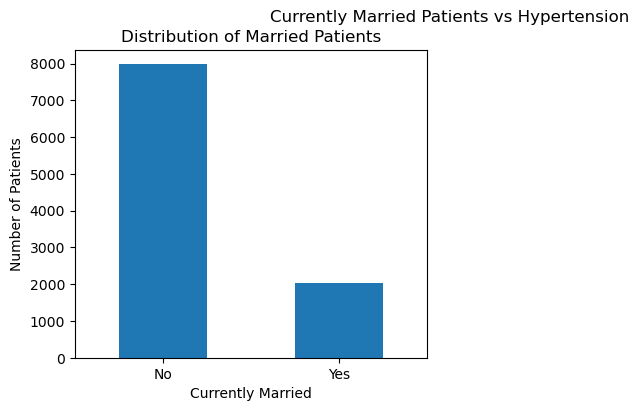

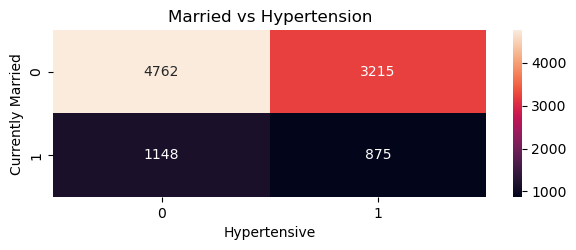

In [54]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Currently Married Patients vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Marital_Married'].value_counts().plot.bar(rot=0)
plt.title('Distribution of Married Patients')
plt.xlabel('Currently Married')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpmar1 = new_df.groupby(["HighBlood", "Marital_Married"]).size().unstack(level=0)
sns.heatmap(bpmar1, annot=True, fmt=".0f")
plt.title("Married vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Currently Married")

plt.tight_layout(pad=2)
plt.show()

In [55]:
# Describes 'Marital_Never Married'

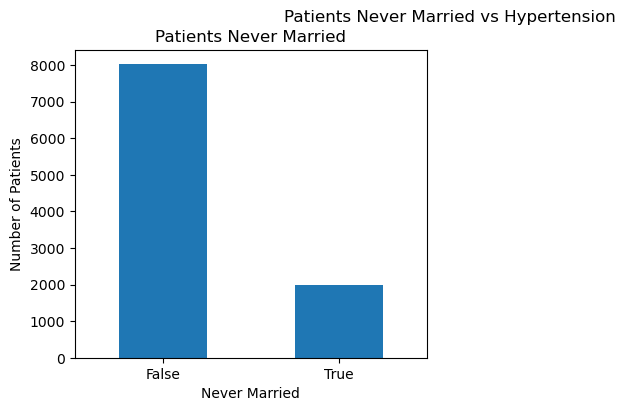

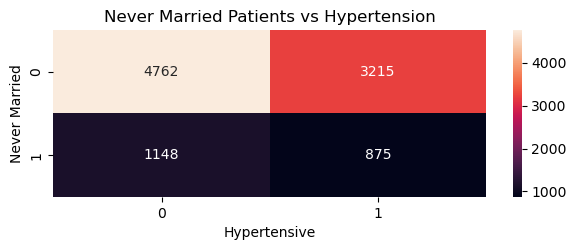

In [56]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Patients Never Married vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Marital_Never Married'].value_counts().plot.bar(rot=0)
plt.title('Patients Never Married')
plt.xlabel('Never Married')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpmar2 = new_df.groupby(["HighBlood", "Marital_Never Married"]).size().unstack(level=0)
sns.heatmap(bpmar1, annot=True, fmt=".0f")
plt.title("Never Married Patients vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Never Married")

plt.tight_layout(pad=2)
plt.show()

In [57]:
# Describes 'Marital_Separated'

new_df['Marital_Separated'].value_counts()

0    8013
1    1987
Name: Marital_Separated, dtype: int64

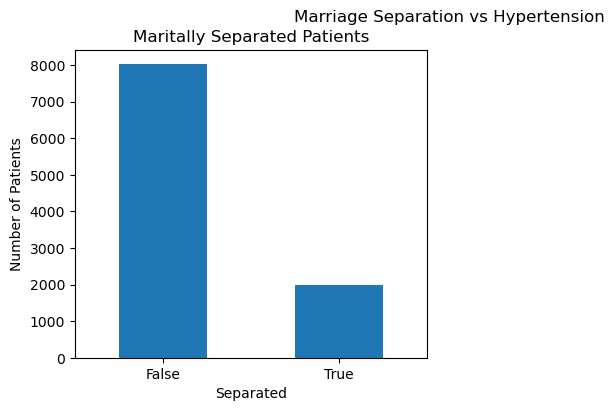

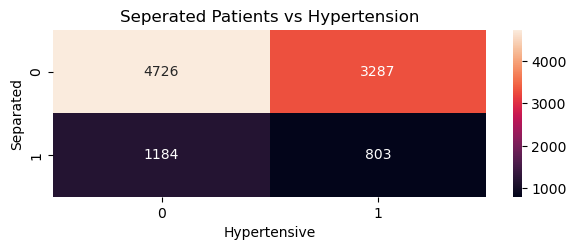

In [58]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Marriage Separation vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Marital_Never Married'].value_counts().plot.bar(rot=0)
plt.title('Maritally Separated Patients')
plt.xlabel('Separated')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['False', 'True'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpmar3 = new_df.groupby(["HighBlood", "Marital_Separated"]).size().unstack(level=0)
sns.heatmap(bpmar3, annot=True, fmt=".0f")
plt.title("Seperated Patients vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Separated")

plt.tight_layout(pad=2)
plt.show()

In [59]:
# Describes 'Marital_Widowed'

new_df['Marital_Widowed'].value_counts()

0    7955
1    2045
Name: Marital_Widowed, dtype: int64

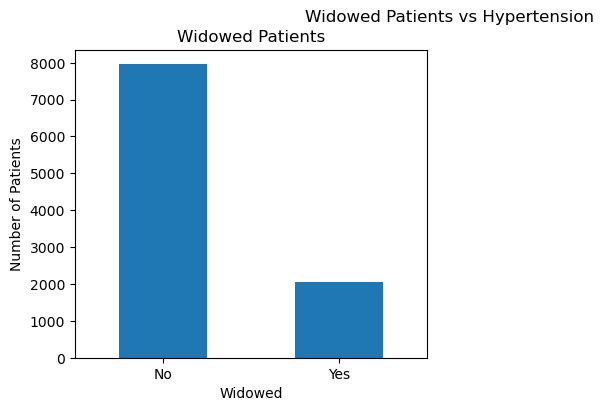

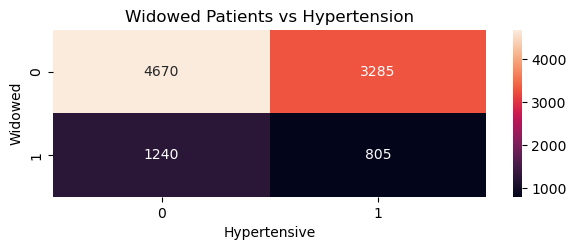

In [60]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Widowed Patients vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Marital_Widowed'].value_counts().plot.bar(rot=0)
plt.title('Widowed Patients')
plt.xlabel('Widowed')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpmar4 = new_df.groupby(["HighBlood", "Marital_Widowed"]).size().unstack(level=0)
sns.heatmap(bpmar4, annot=True, fmt=".0f")
plt.title("Widowed Patients vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Widowed")

plt.tight_layout(pad=2)
plt.show()

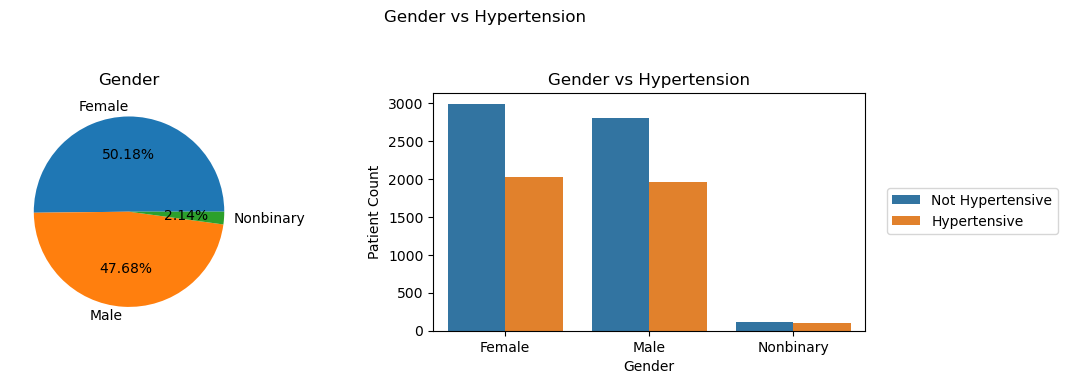

In [61]:
# Creates a figure comparing our explanatory variable with our categoical 'Marital' data prior to transformation and dropping of dummy variable

plt.figure(figsize=(12, 4))
plt.suptitle('Gender vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
plt.title('Gender')
genpie = df['Gender'].value_counts()
gencat = ['Female', 'Male', 'Nonbinary']
plt.pie(genpie, labels=gencat, autopct="%.2F%%")

# Creates a bivariate visualization

plt.subplot(1, 2, 2)
plt.title('Gender vs Hypertension')
sns.countplot(data = df, x="Gender", hue="HighBlood")
plt.legend(['Not Hypertensive', 'Hypertensive'], bbox_to_anchor=(1.05, 0.6), loc='upper left', borderaxespad=0)
plt.xlabel('Gender')
plt.ylabel('Patient Count')

plt.tight_layout(pad=2)
plt.show()

In [62]:
# Describes 'Gender_Male'

new_df['Gender_Male'].value_counts()

0    5232
1    4768
Name: Gender_Male, dtype: int64

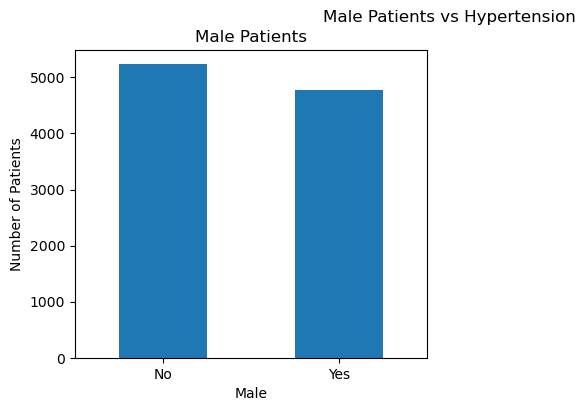

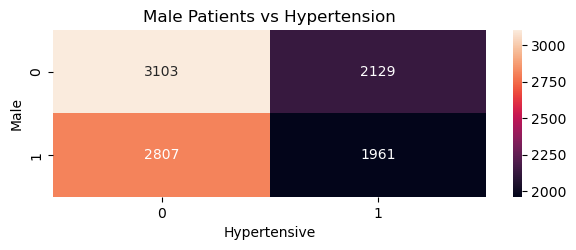

In [63]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Male Patients vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Gender_Male'].value_counts().plot.bar(rot=0)
plt.title('Male Patients')
plt.xlabel('Male')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpgenm = new_df.groupby(["HighBlood", "Gender_Male"]).size().unstack(level=0)
sns.heatmap(bpgenm, annot=True, fmt=".0f")
plt.title("Male Patients vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Male")

plt.tight_layout(pad=2)
plt.show()

In [64]:
# Describes 'Gender_Nonbinary'

new_df['Gender_Nonbinary'].value_counts()

0    9786
1     214
Name: Gender_Nonbinary, dtype: int64

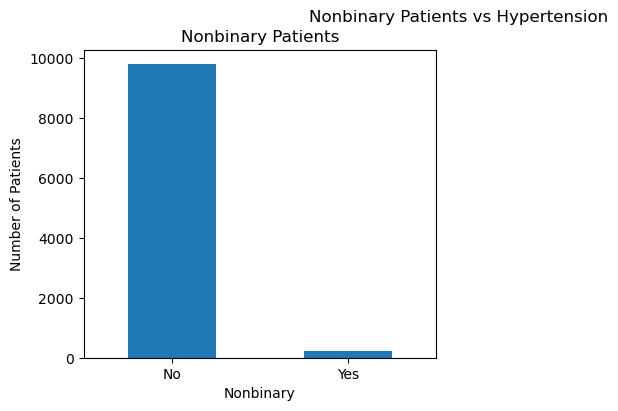

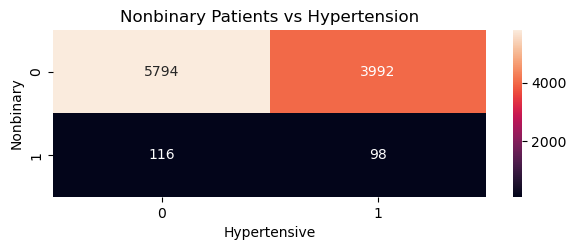

In [65]:
# Creates a figure comparing our explanatory variable with our response variable

plt.figure(figsize=(10, 4))
plt.suptitle('Nonbinary Patients vs Hypertension')

# Creates a univariate visualization

plt.subplot(1, 2, 1)
new_df['Gender_Nonbinary'].value_counts().plot.bar(rot=0)
plt.title('Nonbinary Patients')
plt.xlabel('Nonbinary')
plt.ylabel('Number of Patients')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

# Creates a bivariate visualization

plt.subplot(2, 1, 2)
bpgenn = new_df.groupby(["HighBlood", "Gender_Nonbinary"]).size().unstack(level=0)
sns.heatmap(bpgenn, annot=True, fmt=".0f")
plt.title("Nonbinary Patients vs Hypertension")
plt.xlabel("Hypertensive")
plt.ylabel("Nonbinary")

plt.tight_layout(pad=2)
plt.show()

In [67]:
# Creates our initial logistic regression model

y = new_df['HighBlood']
X = new_df[['Children', 'Age', 'Income', 'VitD_levels', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675414
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9983
Method:                           MLE   Df Model:                           16
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001594
Time:                        21:57:27   Log-Likelihood:                -6754.1
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.1576
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5564      0.204     -2.725      0.006      -0.956      -0.

In [68]:
# Saves our LLR p-value for comparison later

LLR1 = 0.1576
print(LLR1)

0.1576


In [69]:
# Checks variable inflation factor
# Original code credit to Dr. Sewell in aforementioned webinar, slide 42

X = new_df[['Children', 'Age', 'Income', 'VitD_levels', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

print(vif)

                 Variable        VIF
0                Children   1.928107
1                     Age   7.251077
2                  Income   2.942754
3             VitD_levels  16.613428
4                  Stroke   1.247709
5              Overweight   3.366944
6                Diabetes   1.369830
7          Hyperlipidemia   1.502558
8                BackPain   1.692063
9                 Anxiety   1.469476
10        Marital_Married   1.983775
11  Marital_Never Married   1.957346
12      Marital_Separated   1.958906
13        Marital_Widowed   1.987890
14            Gender_Male   1.927398
15       Gender_Nonbinary   1.043628


In [70]:
# Continues reduction via removing variables with VIF > 5; 'VitD_levels' is removed

X = new_df[['Children', 'Age', 'Income', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

print(vif)

                 Variable       VIF
0                Children  1.853890
1                     Age  5.212077
2                  Income  2.697105
3                  Stroke  1.234845
4              Overweight  3.018136
5                Diabetes  1.352934
6          Hyperlipidemia  1.477934
7                BackPain  1.656179
8                 Anxiety  1.440088
9         Marital_Married  1.791311
10  Marital_Never Married  1.754560
11      Marital_Separated  1.755819
12        Marital_Widowed  1.783023
13            Gender_Male  1.852159
14       Gender_Nonbinary  1.039806


In [71]:
# Continues reduction via removing variables with VIF > 5; 'Age' is removed

X = new_df[['Children', 'Income', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]

vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])] 

print(vif)

                 Variable       VIF
0                Children  1.803828
1                  Income  2.560870
2                  Stroke  1.224362
3              Overweight  2.828053
4                Diabetes  1.339078
5          Hyperlipidemia  1.459966
6                BackPain  1.621806
7                 Anxiety  1.420770
8         Marital_Married  1.663820
9   Marital_Never Married  1.642704
10      Marital_Separated  1.632749
11        Marital_Widowed  1.652330
12            Gender_Male  1.814776
13       Gender_Nonbinary  1.037652


In [72]:
# Continues feature reduction via backwards stepwise eliminiation
# Variables with a value of p > .10 are removed

y = new_df['HighBlood']
X = new_df[['Children', 'Income', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675449
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001543
Time:                        21:57:32   Log-Likelihood:                -6754.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                    0.1050
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4337      0.076     -5.693      0.000      -0.583      -0.

In [73]:
# 'Income' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Children', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675449
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9986
Method:                           MLE   Df Model:                           13
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001542
Time:                        21:57:32   Log-Likelihood:                -6754.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.07564
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4361      0.070     -6.214      0.000      -0.574      -0.

In [74]:
# 'BackPain' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Children', 'Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675450
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9987
Method:                           MLE   Df Model:                           12
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001541
Time:                        21:57:33   Log-Likelihood:                -6754.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.05266
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4338      0.068     -6.372      0.000      -0.567      -0.

In [75]:
# 'Children' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Stroke', 'Overweight', 'Diabetes', 'Hyperlipidemia', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675451
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9988
Method:                           MLE   Df Model:                           11
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001539
Time:                        21:57:33   Log-Likelihood:                -6754.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.03525
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4307      0.065     -6.632      0.000      -0.558      -0.

In [76]:
# 'Diabetes' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Stroke', 'Overweight', 'Hyperlipidemia', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Male', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675466
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001517
Time:                        21:57:33   Log-Likelihood:                -6754.7
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.02463
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4376      0.064     -6.876      0.000      -0.562      -0.

In [77]:
# 'Gender_Male' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Stroke', 'Overweight', 'Hyperlipidemia', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675488
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9990
Method:                           MLE   Df Model:                            9
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001485
Time:                        21:57:37   Log-Likelihood:                -6754.9
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.01733
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4245      0.060     -7.025      0.000      -0.543      -0.

In [78]:
# 'Stroke' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Hyperlipidemia', 'Anxiety', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675515
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001445
Time:                        21:57:37   Log-Likelihood:                -6755.1
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                   0.01216
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4163      0.059     -7.010      0.000      -0.533      -0.

In [79]:
# 'Anxiety' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Hyperlipidemia', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675548
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9992
Method:                           MLE   Df Model:                            7
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001396
Time:                        21:57:37   Log-Likelihood:                -6755.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.008532
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4044      0.058     -7.027      0.000      -0.517      -0.

In [80]:
# 'Hyperlipidemia' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675587
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9993
Method:                           MLE   Df Model:                            6
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001338
Time:                        21:57:37   Log-Likelihood:                -6755.9
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.005966
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4171      0.056     -7.483      0.000      -0.526      -0.

In [81]:
# 'Martial_Married' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Gender_Nonbinary']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675627
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001280
Time:                        21:57:38   Log-Likelihood:                -6756.3
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.003944
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3882      0.045     -8.567      0.000      -0.477      -0.

In [82]:
# 'Gender_Nonbinary' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675731
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9995
Method:                           MLE   Df Model:                            4
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:                0.001126
Time:                        21:57:41   Log-Likelihood:                -6757.3
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.004248
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.3839      0.045     -8.492      0.000      -0.473      -0.

In [83]:
# 'Marital_Separated' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Marital_Never Married', 'Marital_Widowed']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.675858
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:               0.0009379
Time:                        21:57:41   Log-Likelihood:                -6758.6
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.005359
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4134      0.041    -10.008      0.000      -0.494      -0.

In [84]:
# 'Marital_Never Married' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight', 'Marital_Widowed']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676018
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:               0.0007007
Time:                        21:57:41   Log-Likelihood:                -6760.2
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.008735
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.4360      0.039    -11.082      0.000      -0.513      -0.359
Overweight    

In [85]:
# 'Marital_Widowed' is removed, reduction continues

y = new_df['HighBlood']
X = new_df[['Overweight']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.676147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:               0.0005102
Time:                        21:57:41   Log-Likelihood:                -6761.5
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.008607
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4521      0.038    -11.882      0.000      -0.527      -0.378
Overweight     0.1181      0.

In [86]:
# Following the last step, we are left with 1 variable and our model becomes a simple regression model
# We can assume an alpha of .10 instead of our original .05 to retain features

# 'A previous model that fits this criteria is selected

y = new_df['HighBlood']
X = new_df[['Overweight', 'Marital_Never Married', 'Marital_Widowed']]
X = sm.add_constant(X) 
logit_model=sm.Logit(y,X)
resultreduced=logit_model.fit()
print(resultreduced.summary())

Optimization terminated successfully.
         Current function value: 0.675858
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              HighBlood   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9996
Method:                           MLE   Df Model:                            3
Date:                Thu, 21 Mar 2024   Pseudo R-squ.:               0.0009379
Time:                        21:57:44   Log-Likelihood:                -6758.6
converged:                       True   LL-Null:                       -6764.9
Covariance Type:            nonrobust   LLR p-value:                  0.005359
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4134      0.041    -10.008      0.000      -0.494      -0.

In [87]:
# Saves our LLR p-value for comparison vs our initial model

LLR2 = 0.005359
print(LLR2)

0.005359


In [88]:
# Compares our models

print(LLR1)
print(LLR2)

# Our reduced model appears to be the best fit of the two vs a model without predictor variables

0.1576
0.005359


In [89]:
# Creates a confusion matrix with an 80/20 data split for training
# Appreciate code borrowed from https://intellipaat.com/blog/confusion-matrix-python/#:~:text=Confusion%20matrix%20is%20one%20of,used%20to%20evaluate%20logistic%20regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
logregress = LogisticRegression()
logregress.fit(X_train, y_train)
y_pred = logregress.predict(X_test)
conmat = confusion_matrix(y_test, y_pred)
print(conmat)

[[1155    0]
 [ 845    0]]


In [90]:
# Provides additional reports to score our training data set

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      1.00      0.73      1155
           1       0.00      0.00      0.00       845

    accuracy                           0.58      2000
   macro avg       0.29      0.50      0.37      2000
weighted avg       0.33      0.58      0.42      2000



C:\Users\caleb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caleb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\caleb\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
# Provides a confusion matrix, without splitting data, based on code in slides from Dr. Sewell's code from Episode 4, Slide 57

cmat = confusion_matrix(y, logregress.predict(X))
print(cmat)

[[5910    0]
 [4090    0]]


In [92]:
# Scores model accuracy based on unsplit data; code borrowed from Dr. Sewell from Episode 4, Slide 57

logregress.score(X, y)

0.591

In [93]:
# Views our coefficients more easily

resultreduced.params

const                   -0.413383
Overweight               0.119772
Marital_Never Married   -0.094588
Marital_Widowed         -0.104707
dtype: float64

In [94]:
# Calculates our odds ratio for 'Overweight' using numpy's exp function
# Assistance in explanation from https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf

np.exp(0.1198)

# A 1-unit increase in 'Overweight' is associated with a 12.72% increase in odds of having hypertension. 

1.1272713747574936

In [95]:
# Calculates our odds ratio for 'Marital_Never Married'
# https://towardsdatascience.com/a-simple-interpretation-of-logistic-regression-coefficients-e3a40a62e8cf

print(np.exp(-0.0946))

print((.9097 - 1) * 100)

# A 1-unit increase in 'Marital_Never Married' is associated with a 9.03% decrease in odds of having hypertension. 

0.9097367564015544
-9.030000000000005


In [98]:
# Calculates our odds ratio for 'Marital_Widowed'

print(np.exp(-0.1047))

print((.9005 - 1) * 100)

# A 1-unit increase in 'Marital_Widowed' is associated with a 9.95% decrease in odds of having hypertension. 

0.9005946604616968
-9.950000000000003
